<a href="https://colab.research.google.com/github/623020514-5/multivariate/blob/main/Exam01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***nnbd_flat.csv ***

ให้นำข้อมูลมาเปรียบเทียบเพื่อไม่ให้ซื้อสินค้าซ้ำ



In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('nndb_flat.csv')
data.head(10) #เรียกข้อมูลจากทั้งหมดมาแค่ 10 row

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
5,1006,Dairy and Egg Products,"CHEESE,BRIE","Cheese, brie",NaN,NaN,NaN,334.0,20.75,27.68,0.45,0.45,0.0,174.0,0.235,1.65,0.0,0.24,65.0,0.380,0.520,0.070,184.0,0.019,0.50,20.0,0.034,188.0,14.5,2.38,0.193333,0.138235,0.687500,0.0,0.016000,0.1625,0.023750,0.400000,0.058333,0.153333,0.000021,0.047619,0.268571,0.263636,0.216364
6,1007,Dairy and Egg Products,"CHEESE,CAMEMBERT","Cheese, camembert",NaN,NaN,NaN,300.0,19.80,24.26,0.46,0.46,0.0,241.0,0.227,1.30,0.0,0.21,62.0,0.630,0.488,0.028,388.0,0.021,0.33,20.0,0.038,347.0,14.5,2.38,0.267778,0.133529,0.541667,0.0,0.014000,0.1550,0.039375,0.375385,0.023333,0.323333,0.000023,0.047619,0.495714,0.263636,0.216364
7,1008,Dairy and Egg Products,"CHEESE,CARAWAY","Cheese, caraway",NaN,NaN,NaN,376.0,25.18,29.20,3.06,0.00,0.0,271.0,0.074,0.27,0.0,0.00,18.0,0.180,0.450,0.031,673.0,0.024,0.64,22.0,0.021,490.0,14.5,2.94,0.301111,0.043529,0.112500,0.0,0.000000,0.0450,0.011250,0.346154,0.025833,0.560833,0.000027,0.052381,0.700000,0.263636,0.267273
8,1009,Dairy and Egg Products,"CHEESE,CHEDDAR","Cheese, cheddar",NaN,NaN,NaN,406.0,24.04,33.82,1.33,0.28,0.0,263.0,0.049,0.88,0.0,0.78,26.0,0.039,0.434,0.027,675.0,0.056,0.16,27.0,0.033,473.0,28.3,3.43,0.292222,0.028824,0.366667,0.0,0.052000,0.0650,0.002437,0.333846,0.022500,0.562500,0.000062,0.064286,0.675714,0.514545,0.311818
9,1010,Dairy and Egg Products,"CHEESE,CHESHIRE","Cheese, cheshire",NaN,NaN,NaN,387.0,23.37,30.60,4.78,0.00,0.0,233.0,0.074,0.83,0.0,0.00,18.0,0.080,0.293,0.046,643.0,0.042,0.21,21.0,0.012,464.0,14.5,2.79,0.258889,0.043529,0.345833,0.0,0.000000,0.0450,0.005000,0.225385,0.038333,0.535833,0.000047,0.050000,0.662857,0.263636,0.253636


**ตรวจสอบขนาดของข้อมูลว่ามี data กี่ตัว และมีกี่ dimensions**

โดยใช้คำสั่ง .shape

```
.shape
```

In [ ]:
nb_data.shape #เพื่อตรวจสอบขนาด

(8618, 45)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9cde8cc490>,
        ...,
        ...,
        ...,
       ...,
        ...,
        ...,
        ...,
      dtype=object)

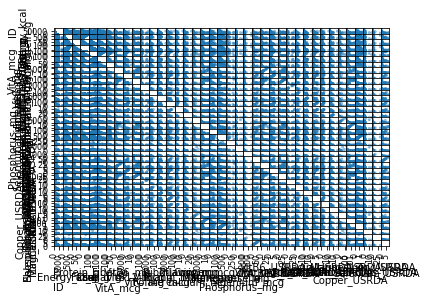

In [ ]:
pd.plotting.scatter_matrix(nb_data)

##ผลของ ***ข้อมูล*** ข้างต้น

จะเห็นได้ว่าข้อมูลมีตัว Dimension จำนวนมาก เนื่องจากมีบางคอลัมน์ที่มีข้อมูลซ้ำกันอยู่
และจากการดูกราฟจะเห็นว่ายังดูยากอยู่ เพราะข้อมูลมีการทับซ้อนกัน และมีจำนวนมาก

###**แก้ปัญหาโดย**

ทดสอบว่าคอลัมน์ใดซ้ำกับคอลัมน์อื่นให้ลบออก โดยการตัดคอลัมน์ให้เหลือแต่คอลัมน์ที่มีข้อมูลเป็นตัวเลข เพื่อจะหาค่า Correlation

In [ ]:
newb_data = data.iloc[:,7:] 
newb_data.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


###ดูค่า correlation ว่าตัวแปรมีความสัมพันธ์กันมากน้อยแค่ไหน

โดยการ import numpy เข้า เพราะเราจะใช้ข้อมูลที่เป็นเชิงปริมาณ

นั่นคือ คำสั่ง

```
import numpy as np
```
**import ไปแล้ว ไม่ต้องทำซ้ำ**

In [ ]:
import numpy as np

In [ ]:
corr2 = np.corrcoef(newb_data.to_numpy().T) #ดูค่า correlation

In [ ]:
corr2.shape #เพื่อดูขนาด(แถว,หลัก)ของค่า correlation

(38, 38)

In [ ]:
corr2

array([[1.        , 0.11030203, 0.80679472, ..., 0.19518065, 0.05667274,
        0.11276635],
       [0.11030203, 1.        , 0.05471538, ..., 0.44460761, 0.37836917,
        0.41631538],
       [0.80679472, 0.05471538, 1.        , ..., 0.06608644, 0.03755914,
        0.02826352],
       ...,
       [0.19518065, 0.44460761, 0.06608644, ..., 1.        , 0.22368557,
        0.26657694],
       [0.05667274, 0.37836917, 0.03755914, ..., 0.22368557, 1.        ,
        0.20529859],
       [0.11276635, 0.41631538, 0.02826352, ..., 0.26657694, 0.20529859,
        1.        ]])

เมื่อแสดงค่า correlation ออกมาแล้ว หลังจากนั้นใช้คำสั่งวนลูปเพื่อดูว่ามีค่าซ้ำกันไหม

In [ ]:
for i in range(corr2.shape[0]): #คำสั่งวนลูป
    for j in range(corr2.shape[1]):
        if (i !=j) and (corr2[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr2[i,j]}')

row = 10 column = 27 corrcoef = 1.0
row = 12 column = 29 corrcoef = 1.0
row = 13 column = 30 corrcoef = 1.0
row = 14 column = 31 corrcoef = 1.0
row = 18 column = 34 corrcoef = 1.0
row = 20 column = 35 corrcoef = 1.0
row = 22 column = 37 corrcoef = 1.0
row = 27 column = 10 corrcoef = 1.0
row = 29 column = 12 corrcoef = 1.0
row = 30 column = 13 corrcoef = 1.0
row = 31 column = 14 corrcoef = 1.0
row = 34 column = 18 corrcoef = 1.0
row = 35 column = 20 corrcoef = 1.0
row = 37 column = 22 corrcoef = 1.0


จะได้ว่ามีผลรันออกมาแสดงว่ามีค่าซ้ำกัน

In [ ]:
newb_data.iloc[:5,10:30] 

,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA
0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625
1,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625
2,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188
3,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500
4,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375


##**นำ Data ไป plot graph**
โดยใช้

```
import matplotlib.pyplot as plt
```

**เพื่อดูแนวโน้มของข้อมูล**

In [ ]:
import matplotlib.pyplot as plt

##**Plot graph correlation**

##Plot graph correlation that is 1. >> The graph will be a straight line.

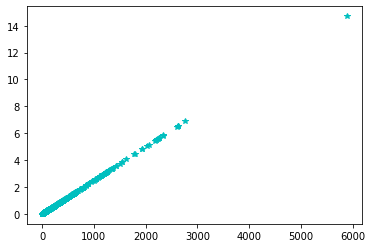

In [ ]:
plt.plot(newb_data.iloc[:,11],newb_data.iloc[:,28],'*c')

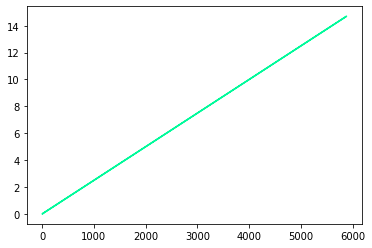

In [ ]:
plt.plot(newb_data.iloc[:,11],newb_data.iloc[:,28],'mediumspringgreen') 
#จะสามารถเห็นได้ชัดเจนกว่า

เพราะเป็นข้อมูลที่มาจากที่เดียวกัน ค่า correlation จะเป็นเส้นตรง

**try to plot graph other correlation**

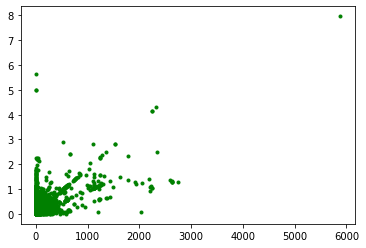

In [ ]:
plt.plot(newb_data.iloc[:,11],newb_data.iloc[:,29],'g.')

เพราะเป็นข้อมูลที่ไม่ได้มาจากที่เดียวกัน ค่า correlation จะเป็นเเบบกระจายออก ไม่เป็นเส้นตรง

ลองเช็คว่ามีค่าซ้ำกันหรือไม่จาก true and false โดย True:จะมี '_USRDA'in column

In [ ]:
newb_data.columns.str.contains('_USRDA')

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

จากผลรันจะเห็นว่ามีคอลัมน์ที่มีค่าเป็น true อยู่ 15 คอลัมน์ 
เราจะทำการ '.valuse'

In [ ]:
newb_data.columns[newb_data.columns.str.contains('_USRDA')].values

array(['VitA_USRDA', 'VitB6_USRDA', 'VitB12_USRDA', 'VitC_USRDA',
       'VitE_USRDA', 'Folate_USRDA', 'Niacin_USRDA', 'Riboflavin_USRDA',
       'Thiamin_USRDA', 'Calcium_USRDA', 'Copper_USRDA',
       'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'], dtype=object)

In [ ]:
newb_data.drop(newb_data.columns[newb_data.columns.str.contains('_USRDA')].values, axis=1)

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,2.38,15.0,3.300,0.190,0.020,66.0,0.100,1.40,60.0,0.000,254.0,73.4,1.10
8614,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,0.00,20.0,1.076,0.024,0.012,10.0,0.033,0.58,37.0,0.029,426.0,21.7,1.55
8615,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.00,0.0,0.100,0.060,0.130,13.0,0.020,3.60,10.0,0.000,8.0,0.7,0.19
8616,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,5.00,6.0,1.400,0.120,0.010,10.0,0.400,3.50,250.0,0.000,272.0,27.4,1.00


***Then delete the columns. We will delete the columns that have correlation = 1 compared to other columns.***

In [ ]:
data_dropped1 = newb_data.drop(['VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'], axis=1)
data_dropped1

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [ ]:
data_dropped2 = data.drop(['ID','ShortDescrip','Descrip','CommonName','MfgName','ScientificName','VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'], axis=1)
data_dropped2

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,Dairy and Egg Products,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,Dairy and Egg Products,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,Dairy and Egg Products,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,Dairy and Egg Products,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,Dairy and Egg Products,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,Finfish and Shellfish Products,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,Finfish and Shellfish Products,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,Sweets,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,Finfish and Shellfish Products,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


##**นำ Data ไป plot graph**
โดยใช้

```
import matplotlib.pyplot as plt
```

**เพื่อดูแนวโน้มของข้อมูล**

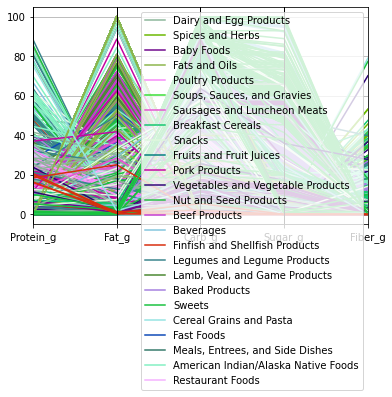

In [ ]:
pd.plotting.parallel_coordinates(data_dropped2, 'FoodGroup', cols=['Protein_g', 'Fat_g',	'Carb_g',	'Sugar_g',	'Fiber_g'])

###จากกราฟ จะเห็นว่าข้อมูลมีมากเกินไป ดังนั้น ต้องใช้ PCA ในการแก้ปัญหาเพื่อจำแนกข้อมูลข้อมูลในการลดจำนวน Dimention ของข้อมูล 

จำแนก ภาษาอังกฤษ คือ decomposition

In [ ]:
from sklearn.decomposition import PCA 
#เพื่อจำแนกข้อมูลทีมีจำนวนมากเกินไป และใช้มอดูล sklearn เพื่อจัดทำข้อมูลให้เป็นมาตรฐาน

In [ ]:
pca = PCA(n_components=2) #เพื่อกำหนดว่าจะจำแนกเป็นแค่ 2

หลังจากนั้นใช้ method fit ในการหาค่าเฉลี่ยและส่วนเบี่ยงเบนมาตรฐาน และ method transform เพื่อทำการแปลงค่าให้เป็นค่าที่ปรับเป็นมาตรฐาน

โดยจะใช้เป็นคำสั่งลัด คือ


```
fit_transform
```

In [ ]:
newb_pca = pca.fit_transform(newdata_dropped.to_numpy())

In [ ]:
newb_pca.shape #เพื่อแสดงขนาด

(8618, 2)

In [ ]:
newb_pca

array([[ 590.95286674,   85.56968946],
       [ 590.95284476,   85.57159456],
       [ 747.5994042 ,  117.79120834],
       ...,
       [ -95.72739188,  -53.51885094],
       [ -66.70492177, -118.10632681],
       [ -65.40356382,  -28.88067151]])

####**หลังจากนั้นให้สร้างเซตตัวแปรของ Data brand**

In [ ]:
fgnn = set(data['FoodGroup'])
fgnn

{'American Indian/Alaska Native Foods',
 'Baby Foods',
 'Baked Products',
 'Beef Products',
 'Beverages',
 'Breakfast Cereals',
 'Cereal Grains and Pasta',
 'Dairy and Egg Products',
 'Fast Foods',
 'Fats and Oils',
 'Finfish and Shellfish Products',
 'Fruits and Fruit Juices',
 'Lamb, Veal, and Game Products',
 'Legumes and Legume Products',
 'Meals, Entrees, and Side Dishes',
 'Nut and Seed Products',
 'Pork Products',
 'Poultry Products',
 'Restaurant Foods',
 'Sausages and Luncheon Meats',
 'Snacks',
 'Soups, Sauces, and Gravies',
 'Spices and Herbs',
 'Sweets',
 'Vegetables and Vegetable Products'}

จะเห็นว่าข้อมูลเป็น ***ข้อควม*** ดังนั้นจะไม่สามารถนำไป plot graph's color ได้ จึงต้องทำการแปลงข้อมูลให้เป็นตัวเลข

In [ ]:
fgnn_l = list(fgnn)  #เพื่อแปลงข้อมูลที่เป็นข้อความเป็นตัวเลข
fgnn_l.sort() #เพื่อจัดเรียงข้อมูล
color_list1 = {} #โดยจัดการให้เข้าไปอยู่ในเซต color_list1
num = 0
for each_fgnn in fgnn_l:#ใช้คำสั่งวนลูป เพื่อใช้จัดเก็บข้อมูล
    if each_fgnn not in color_list1:
        color_list1[each_fgnn] = num
        num += 1

In [ ]:
color_list1 #แสดงผลตัวแปร color_list1

{'American Indian/Alaska Native Foods': 0,
 'Baby Foods': 1,
 'Baked Products': 2,
 'Beef Products': 3,
 'Beverages': 4,
 'Breakfast Cereals': 5,
 'Cereal Grains and Pasta': 6,
 'Dairy and Egg Products': 7,
 'Fast Foods': 8,
 'Fats and Oils': 9,
 'Finfish and Shellfish Products': 10,
 'Fruits and Fruit Juices': 11,
 'Lamb, Veal, and Game Products': 12,
 'Legumes and Legume Products': 13,
 'Meals, Entrees, and Side Dishes': 14,
 'Nut and Seed Products': 15,
 'Pork Products': 16,
 'Poultry Products': 17,
 'Restaurant Foods': 18,
 'Sausages and Luncheon Meats': 19,
 'Snacks': 20,
 'Soups, Sauces, and Gravies': 21,
 'Spices and Herbs': 22,
 'Sweets': 23,
 'Vegetables and Vegetable Products': 24}

***จาก Dictionary ให้นำค่าที่ใช้แทนข้อความมา***

In [ ]:
data_dropped3 = data_dropped2.replace(color_list1)

In [ ]:
data_dropped3

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,7,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,7,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,7,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,7,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,7,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,10,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,10,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,23,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,10,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


#**plot scatter เพื่อดูการกระจายข้อมูล** 

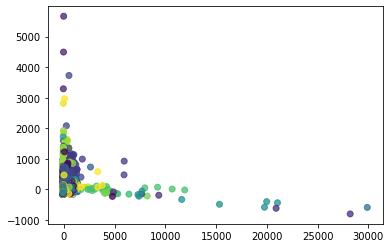

In [ ]:
plt.scatter(newb_pca[:,0],newb_pca[:,1],c = data_dropped3['FoodGroup'],alpha=0.75)
#เมื่อเรากำหนดให้แอลฟ่าเท่ากับ 0.75

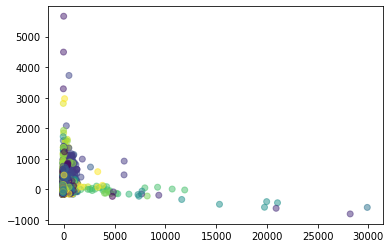

In [ ]:
plt.scatter(newb_pca[:,0],newb_pca[:,1],c = data_dropped3['FoodGroup'],alpha=0.5)
#เมื่อเรากำหนดให้แอลฟ่าเท่ากับ 0.5

ลองแบบไม่กำหนดค่าแอลฟ่า

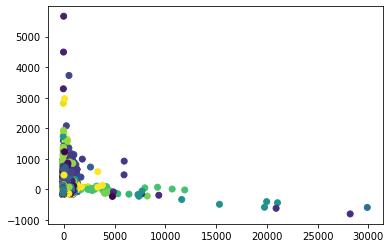

In [ ]:
plt.scatter(newb_pca[:,0],newb_pca[:,1],c = data_dropped3['FoodGroup'])

**ทดลองเปรียบเทียบระหว่าง Beef Products ;3 กบ Fats and Oils ; 9**

In [ ]:
bf = data_dropped3[(data_dropped3['FoodGroup']==3) | (data_dropped3['FoodGroup']==9)] 
bf

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
610,9,902.0,0.0,100.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.000,0.00,0.0,0.2,0.000000,0.000000,0.0000,0.000000,0.180000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003636,0.000000
611,9,902.0,0.0,100.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.000,0.00,0.0,0.2,0.000000,0.000000,0.0000,0.000000,0.040000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003636,0.010000
612,9,334.0,0.6,32.9,8.5,4.20,0.1,0.0,0.00,0.00,0.3,0.0,6.0,0.000,0.20,0.0,0.0,0.000000,0.000000,0.0000,0.003333,0.000000,0.000,0.000000,0.000000,0.000000,0.005000,0.000000,0.000000,0.082857,0.000000,0.000000
613,9,70.0,0.2,2.7,12.4,6.80,2.0,0.0,0.00,0.00,0.0,0.0,6.0,0.000,0.10,0.0,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.005000,0.000000,0.000000,0.038571,0.000000,0.000000
614,9,84.0,0.2,2.7,15.5,10.30,1.9,0.0,0.00,0.00,0.0,0.0,6.0,0.000,0.12,0.0,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.005000,0.000000,0.000000,0.007143,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8534,9,263.0,0.9,19.0,23.9,4.34,0.0,21.0,0.02,0.21,0.0,6.0,14.0,0.001,0.26,0.0,1.6,0.023333,0.011765,0.0875,0.000000,0.204667,0.015,0.000000,0.015385,0.008333,0.011667,0.000001,0.004762,0.042857,0.029091,0.016364
8535,9,326.0,1.8,35.0,2.0,2.00,0.2,11.0,0.08,0.09,8.8,0.0,4.0,0.030,0.27,0.0,1.6,0.012222,0.047059,0.0375,0.097778,0.266667,0.000,0.043750,0.015385,0.033333,0.003333,0.000033,0.014286,0.035714,0.029091,0.018182
8541,9,231.0,0.3,19.2,16.0,4.20,0.0,0.0,0.00,0.06,0.0,0.0,0.0,0.000,0.00,0.0,1.6,0.000000,0.000000,0.0250,0.000000,0.428667,0.000,0.000000,0.007692,0.000000,0.000000,0.000000,0.000000,0.000000,0.029091,0.010000
8598,9,688.0,0.0,77.8,0.3,0.30,0.0,0.0,0.01,0.00,0.0,0.0,7.0,0.000,0.23,0.0,1.6,0.000000,0.005882,0.0000,0.000000,0.786000,0.000,0.000625,0.046154,0.008333,0.005833,0.000000,0.002381,0.035714,0.029091,0.011818


In [ ]:
pca = PCA(n_components=2)
newbf_pca = pca.fit_transform(bf.iloc[:,1:].to_numpy())

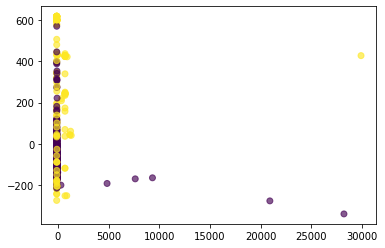

In [ ]:
plt.scatter(newbf_pca[:,0],newbf_pca[:,1],c = bf['FoodGroup'],alpha=0.65)

In [ ]:
beef_pca = pca.transform(bf[bf['FoodGroup']==3].iloc[:,1:].to_numpy())
FO_pca = pca.transform(bf[bf['FoodGroup']==9].iloc[:,1:].to_numpy())

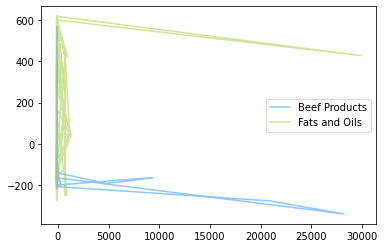

In [ ]:
plt.plot(beef_pca[:,0],beef_pca[:,1],'dodgerblue',alpha=0.5,label='Beef Products')
plt.plot(FO_pca[:,0],FO_pca[:,1],'yellowgreen',alpha=0.5,label='Fats and Oils')
plt.legend()

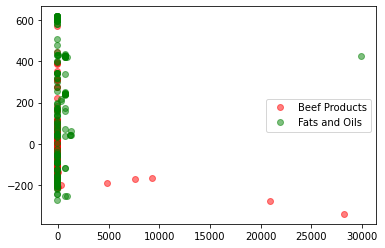

In [ ]:
plt.plot(beef_pca[:,0],beef_pca[:,1],'or',alpha=0.5,label='Beef Products')
plt.plot(FO_pca[:,0],FO_pca[:,1],'og',alpha=0.5,label='Fats and Oils')
plt.legend()

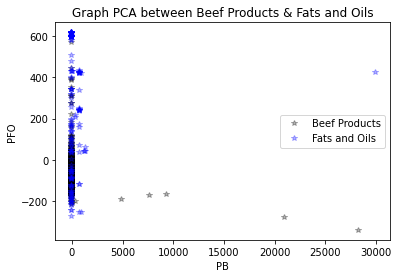

In [ ]:
plt.plot(beef_pca[:,0],beef_pca[:,1],'*k',alpha=0.3,label='Beef Products')
plt.plot(FO_pca[:,0],FO_pca[:,1],'*b',alpha=0.3,label='Fats and Oils')
plt.legend()
plt.title('Graph PCA between Beef Products & Fats and Oils') #กำหนดชื่อกราฟ
plt.xlabel('PB'); #กำหนดชื่อแกน y
plt.ylabel('PFO'); #กำหนดชื่อแกน x

In [ ]:
pca.explained_variance_ratio_

array([0.97586356, 0.02372156])

จากข้อมูลข้างต้น จะคิดได้เป็น 97.58% กับ 2.37% ซึ่งคิดเป็น 99.95% ถือว่าเป็นตัวแทนข้อมูลที่ดีมาก

**จากการทำ PCA or Principal Components Analysis จะเห็นว่า Components สามารถ explain variance ได้มาก ซึ่งอาจเป็นตัวแทนที่ Decompose แล้ว**

##**Import PIZZA datd from your lean**

1.เรียกใช้ panda

In [ ]:
import pandas as pd #เขียนโค้ดเรียกใช้

2.save file ลงเครื่องแล้วโหลดเข้า google colab อาจเช็คชื่อไฟล์โดย copy paste

In [ ]:
data = pd.read_csv('Pizza.csv')
data.head(10) #เรียกแสดงข้อมูลทั้งหมด 10 ตัว

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
5,A,14075,31.14,20.23,42.31,4.92,1.65,1.40,4.67
6,A,14082,31.21,20.97,41.34,4.71,1.58,1.77,4.63
7,A,14097,28.76,21.41,41.60,5.28,1.75,2.95,4.72
8,A,14117,28.22,20.48,45.10,5.02,1.71,1.18,4.93
9,A,14133,27.72,21.19,45.29,5.16,1.66,0.64,4.95


**ตรวจสอบขนาดของข้อมูลว่ามี data กี่ตัว และมีกี่ dimensions**

โดยใช้คำสั่ง .shape

```
.shape
```
เพื่อเช็ค(เเถว,หลัก) หรือขนาด


In [ ]:
data.shape

(300, 9)

**try to plot scatter 
matrix เพื่อดูการกระจายของ data in other viwe**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d9e54c190>,
      dtype=object)

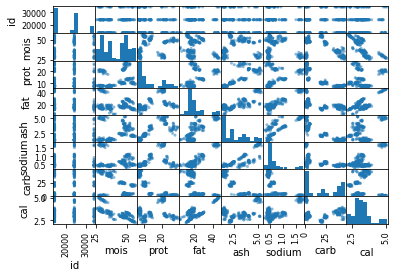

In [ ]:
pd.plotting.scatter_matrix(data)

##ผลของ ***ข้อมูล*** ข้างต้น

จะเห็นได้ว่าข้อมูลมีตัว Dimension จำนวนมาก เนื่องจากมีบางคอลัมน์ที่มีข้อมูลซ้ำกันอยู่
และจากการดูกราฟจะเห็นว่ายังดูยากอยู่ เพราะข้อมูลมีการทับซ้อนกัน และมีจำนวนมาก

###**แก้ปัญหาโดย**

ทดสอบว่าคอลัมน์ใดซ้ำกับคอลัมน์อื่นให้ลบออก โดยการตัดคอลัมน์ให้เหลือแต่คอลัมน์ที่มีข้อมูลเป็นตัวเลข เพื่อจะหาค่า Correlation



In [ ]:
newdata = data.iloc[:,1:]
newdata.head()

,id,mois,prot,fat,ash,sodium,carb,cal
0,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


###ดูค่า correlation ว่าตัวแปรมีความสัมพันธ์กันมากน้อยแค่ไหน

โดยการ import numpy เข้า เพราะเราจะใช้ข้อมูลที่เป็นเชิงปริมาณ

นั่นคือ คำสั่ง

```
import numpy as np
```



In [ ]:
import numpy as np

In [ ]:
corr = np.corrcoef(newdata.to_numpy().T) #ดูค่า correlation

In [ ]:
corr.shape #เพื่อดูจำนวน(แถว,หลัก)ของค่า correlation

(8, 8)

In [ ]:
corr #แสดงค่า correlation

array([[ 1.        ,  0.03259505, -0.07648546, -0.00486006, -0.03407156,
        -0.01515608,  0.01496614, -0.02120862],
       [ 0.03259505,  1.        ,  0.36024768, -0.17131821,  0.26555552,
        -0.1022789 , -0.59180165, -0.76444054],
       [-0.07648546,  0.36024768,  1.        ,  0.49800167,  0.8238437 ,
         0.42912952, -0.85354226,  0.0702581 ],
       [-0.00486006, -0.17131821,  0.49800167,  1.        ,  0.79163396,
         0.93332522, -0.64023817,  0.7645671 ],
       [-0.03407156,  0.26555552,  0.8238437 ,  0.79163396,  1.        ,
         0.80812215, -0.89898837,  0.32646845],
       [-0.01515608, -0.1022789 ,  0.42912952,  0.93332522,  0.80812215,
         1.        , -0.62017634,  0.6719575 ],
       [ 0.01496614, -0.59180165, -0.85354226, -0.64023817, -0.89898837,
        -0.62017634,  1.        , -0.02348458],
       [-0.02120862, -0.76444054,  0.0702581 ,  0.7645671 ,  0.32646845,
         0.6719575 , -0.02348458,  1.        ]])

เมื่อแสดงค่า correlation ออกมาแล้ว หลังจากนั้นใช้คำสั่งวนลูปเพื่อดูว่ามีค่าซ้ำกันไหม

In [ ]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')

จะเห็นได้ว่า ไม่มีค่า correlation ที่ซ้ำกัน เพราะไม่มีผลรันออกมา

ดังนั้น ไม่ต้องตัด data ใดออกมา แต่ต้องทำการลบ คอลัมน์ id ออก เพราะไม่ใช่คอลัมน์ที่เป็นข้อมูลเชิงปริมาณ หรือข้อมูลที่เป็นตัวเลข

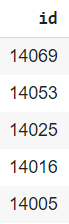

##ดังนั้น เราจะเหลือคอลัมน์ brand 

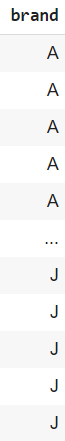

##เพื่อใช้ในการจำแนกกลุ่ม Data

In [ ]:
data_test = data.drop(['id'],axis=1) #delete id column
data_test 

,brand,mois,prot,fat,ash,sodium,carb,cal
0,A,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...
295,J,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,47.60,10.43,15.18,2.32,0.56,24.47,2.76


จากนั้นค่อยลบ brand column and id column

In [ ]:
data_test2 = data.drop(['id','brand'],axis=1) 
data_test2

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...
295,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,47.60,10.43,15.18,2.32,0.56,24.47,2.76


##**นำ Data ไป plot graph**
โดยใช้

```
import matplotlib.pyplot as plt
```

**เพื่อดูแนวโน้มของข้อมูล**

###อ้างอิงจาก matplotlib or website:https://matplotlib.org/2.0.2/users/pyplot_tutorial.html?fbclid=IwAR1a6gnlXTUZRJ-p6LN9OmpAy8D1G9WDKniI03ZFjTIX-JLtVQSYfJ6oj_w

In [ ]:
import matplotlib.pyplot as plt

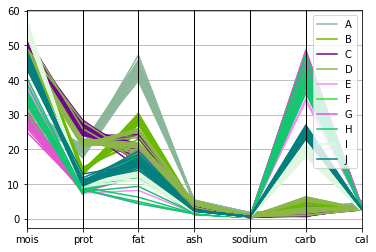

In [ ]:
pd.plotting.parallel_coordinates(data_test, 'brand')

###จากกราฟ จะเห็นว่าข้อมูลมีมากเกินไป ดังนั้น ต้องใช้ PCA ในการแก้ปัญหาเพื่อจำแนกข้อมูลข้อมูลในการลดจำนวน Dimention ของข้อมูล 

จำแนก ภาษาอังกฤษ คือ decomposition

In [ ]:
from sklearn.decomposition import PCA 
#เพื่อจำแนกข้อมูลทีมีจำนวนมากเกินไป และใช้มอดูล sklearn เพื่อจัดทำข้อมูลให้เป็นมาตรฐาน

In [ ]:
pca = PCA(n_components=2) #เพื่อกำหนดว่าจะจำแนกเป็นแค่ 2 ตามที่เรียน

หลังจากนั้นใช้ method fit ในการหาค่าเฉลี่ยและส่วนเบี่ยงเบนมาตรฐาน และ method transform เพื่อทำการแปลงค่าให้เป็นค่าที่ปรับเป็นมาตรฐาน

โดยจะใช้เป็นคำสั่งลัด คือ


```
fit_transform
```



In [ ]:
new_pca = pca.fit_transform(data_test2.to_numpy()) 

In [ ]:
new_pca.shape #เพื่อแสดงขนาด

(300, 2)

In [ ]:
new_pca

array([[-2.49517479e+01,  2.68116678e+01],
       [-2.46119758e+01,  2.56595634e+01],
       [-2.49384190e+01,  2.69305710e+01],
       [-2.43255609e+01,  2.35235671e+01],
       [-2.38660483e+01,  2.26528128e+01],
       [-2.42716473e+01,  2.25496261e+01],
       [-2.38806695e+01,  2.18852969e+01],
       [-2.23894923e+01,  2.39358506e+01],
       [-2.45074215e+01,  2.66033180e+01],
       [-2.50928469e+01,  2.71508163e+01],
       [-2.48185674e+01,  2.76159021e+01],
       [-2.39395254e+01,  2.75274080e+01],
       [-2.44496724e+01,  2.62221990e+01],
       [-2.28480039e+01,  2.27702098e+01],
       [-2.42812192e+01,  2.25656557e+01],
       [-2.38786302e+01,  2.39995991e+01],
       [-2.32390338e+01,  1.96576785e+01],
       [-2.36081213e+01,  1.88694931e+01],
       [-2.34833228e+01,  2.08403006e+01],
       [-2.30861647e+01,  2.25687679e+01],
       [-2.44317537e+01,  2.88343106e+01],
       [-2.39812139e+01,  2.72251577e+01],
       [-2.43513670e+01,  2.27327854e+01],
       [-2.

####หลังจากนั้นให้สร้างเซตตัวแปรของ Data brand

In [ ]:
bd = set(data['brand'])
bd

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'}

จะเห็นว่าข้อมูลเป็น ***ข้อควม*** ดังนั้นจะไม่สามารถนำไป plot graph's color ได้ จึงต้องทำการแปลงข้อมูลให้เป็นตัวเลข

In [ ]:
bd_l = list(bd)  #เพื่อแปลงข้อมูลที่เป็นข้อความเป็นตัวเลข
bd_l.sort() #เพื่อจัดเรียงข้อมูล
color_list = {}
num = 0
for each_b in bd_l:#ใช้คำสั่งวนลูป เพื่อใช้จัดเก็บข้อมูล
    if each_b not in color_list:
        color_list[each_b] = num
        num += 1

In [ ]:
color_list

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9}

จาก Dictionary ให้นำค่าที่ใช้แทนข้อความมา

In [ ]:
data2 = data_test.replace(color_list)

In [ ]:
data2

,brand,mois,prot,fat,ash,sodium,carb,cal
0,0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,0,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,0,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,0,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,0,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...
295,9,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,9,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,9,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,9,47.60,10.43,15.18,2.32,0.56,24.47,2.76


plot scatter เพื่อดูการกระจายข้อมูล เมื่อเรากำหนดให้แอลฟ่าเท่ากับ 0.65

 **ไม่ต้อง import matplotlib.pyplot as plt ใหม่**

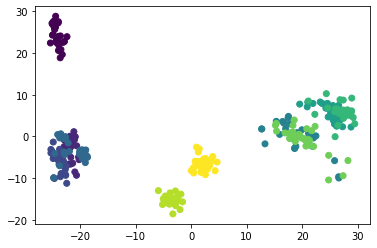

In [ ]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data2['brand']) 
##ลองพล็อตกราฟ

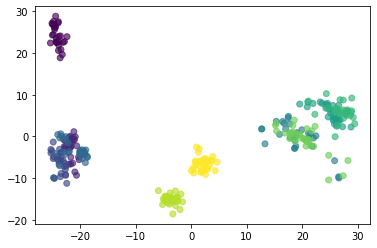

In [ ]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data2['brand'],alpha=0.65)

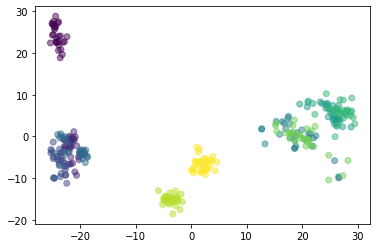

In [ ]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data2['brand'],alpha=0.5)
#อาจารย์พากำหนดแอลฟ่าเป็น 0.5

**ทดลองเปรียบเทียบระหว่างสารอาหารของแบรนด์ C กบ สารอาหารของแบรนด์ J**

In [ ]:
test_1 = data2[(data2['brand']==2) | (data2['brand']==9)]  
test_1

,brand,mois,prot,fat,ash,sodium,carb,cal
60,2,48.40,26.05,21.40,3.44,0.50,0.71,3.00
61,2,48.69,28.48,17.37,3.53,0.43,1.93,2.78
62,2,48.88,25.23,20.89,3.22,0.47,1.78,2.96
63,2,48.97,25.63,19.28,3.48,0.55,2.64,2.87
64,2,48.84,23.98,23.37,3.00,0.52,0.81,3.09
65,2,49.73,25.65,19.98,2.51,0.52,2.13,2.91
66,2,50.18,28.30,15.79,3.47,0.45,2.26,2.64
67,2,48.15,27.98,18.69,3.58,0.48,1.70,2.87
68,2,49.72,27.31,16.89,3.08,0.25,3.00,2.73
69,2,51.59,26.24,16.41,3.61,0.60,2.15,2.61


**เปรียบเทียบ between C and J By plot graph กำหนด Dimention ให้เท่ากับ 2**

In [ ]:
pca2 = PCA(n_components=2) 
new_pca2 = pca2.fit_transform(test_1.iloc[:,1:].to_numpy())

In [ ]:
BC_pca = pca.transform(test_1[test_1['brand']==2].iloc[:,1:].to_numpy())
BJ_pca = pca.transform(test_1[test_1['brand']==9].iloc[:,1:].to_numpy())

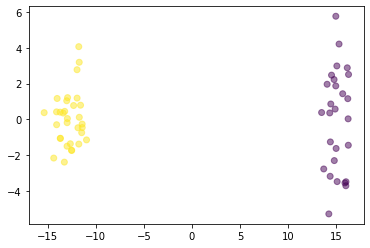

In [ ]:
plt.scatter(new_pca2[:,0],new_pca2[:,1],c = test_1['brand'],alpha=0.5)

จัดกราฟโดยใส่ระบุกราฟ และแกนทั้งสองข้าง

In [ ]:
pca2.explained_variance_ratio_

array([0.96873301, 0.02338064])

จากข้อมูลข้างต้น จะคิดได้เป็น 96.87% กับ 2.33% ซึ่งคิดเป็น 99.20% 

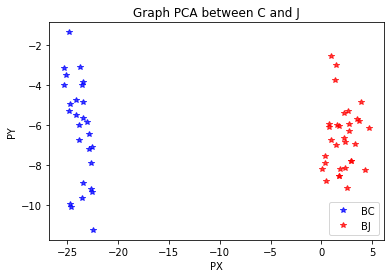

In [ ]:
plt.plot(BC_pca[:,0],BC_pca[:,1],'*b',alpha=0.75,label='BC')
plt.plot(BJ_pca[:,0],BJ_pca[:,1],'*r',alpha=0.75,label='BJ')
plt.legend()
plt.title('Graph PCA between C and J') #กำหนดชื่อกราฟ
plt.xlabel('PX'); #กำหนดชื่อแกน y
plt.ylabel('PY'); #กำหนดชื่อแกน x

**จากการทำ PCA or Principal Components Analysis จะเห็นว่า Components สามารถ explain variance ได้มาก ซึ่งอาจเป็นตัวแทนที่ Decompose แล้ว**